# Домашнее задание №2
Основы машинного обучения. А.Мамаев  
Группа ML-11. __Студент - Усцов Артем Алексеевич__

In [1]:
# Для функционирования watermark - раскомментируйте строку ниже, либо установите библиотеку в консоли вручную
# !pip install watermark
%load_ext watermark

In [2]:
%watermark -v -m -p numpy,scipy,matplotlib,seaborn,sklearn -g

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.28.0

numpy     : 1.20.1
scipy     : 1.6.2
matplotlib: 3.4.3
seaborn   : 0.11.2
sklearn   : 0.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.4.0-88-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Git hash: 514fb51c8d09bc3e1e4d8f3d7944585999e1c7cd



В качестве домашнего задания вам предлагается поработать над предсказанием погоды. Файл с данными вы найдете в соответствующей директории. Вам будет доступен датасет weather.csv, ПЕРВЫЕ 75% (shuffle = False) которого нужно взять для обучения, последние 25% - для тестирования.

__Требуется построить 4 модели которые будут предсказывать целевую переменную <b>RainTomorrow</b> с помощью:__

   1. логистической регрессии [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
   
   2. метода ближайших соседей [sklearn.neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
 
   3. Байесовского классификатора [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
   
   4. логистической регрессии реализованной самостоятельно

Затем следует сравнить результаты моделей (по качеству и времени выполнения) и сделать вывод о том, какая модель и с какими параметрами даёт лучшие результаты.  
__(%timeit)__

Не забывайте о том, что работа с признаками играет очень большую роль в построении хорошей модели.

__Краткое описание данных:__

    - Date - дата наблюдений, в формате год-месяц-день
    - Location - название локации, в которой расположена метеорологическая станция
    - MinTemp - минимальная температура в градусах Цельсия
    - MaxTemp - максимальная температура в градусах Цельсия
    - Rainfall - количество осадков, зафиксированных за день в мм
    - Evaporation - так называемое "pan evaporation" класса А (мм) за 24 часа до 9:00
    - Sunshine - число солнечных часов за день
    - WindGustDir - направление самого сильного порыва ветра за последние 24 часа
    - WindGustSpeed - скорость (км/ч) самого сильного порыва ветра за последние 24 часа
    - WindDir9am - направление ветра (км/ч) в 9:00
    - WindDir3pm - направление ветра (км/ч)в 15:00
    - WindSpeed9am - скорость ветра в (км/ч) в 9:00
    - WindSpeed3pm - скорость ветра в (км/ч) в 15:00
    - Humidity9am - относительная влажность воздуха (%) в 9:00
    - Humidity3pm - относительная влажность воздуха (%) в 15:00
    - Cloud9am - класс облачности (от 0 до 9, где 0 - нет облаков, 9 - очень облачно) в 9:00
    - Cloud3pm - класс облачности (от 0 до 9, где 0 - нет облаков, 9 - очень облачно) в 15:00
    - Temp9am - температура воздуха в 9:00 в градусах Цельсия
    - Temp3pm - температура воздуха в 15:00 в градусах Цельсия
    - Pressure9am - атмосферное давление в Па в 9:00
    - Pressure3pm - атмосферное давление в Па в 15:00
    - RainToday - метка, показывающая будет ли дождь сегодня (Yes or No) 
    
Целевая переменная - RainTommorow - состоит из меток Yes or Nо - будет дождь завтра или нет.
Задача сводится к задаче бинарной классификации

# Executive Summary
В ходе выполненной домашней работы были обучены 4 модели классификатора.  
Краткая выдержка по результатам:  
 - 1) Подготовлен входящий датасет (пропуски заменены средним значением)
 - 2) Данные разделены на две группы (вещественные и категориальные+бинарные). Для категориальных данных прозведен one-hot encoding  
 - 3) Данные отмасштабированы (стандартизация). Полиномиализация данных не применялась в связи с трудностью интерпретации дальнейших результатов
 - 4) Стратификация не выполнялась в связи с наличием данных временной компаненты
 - 6) Осуществлена попытка сбалансировать признаки в датасете (найден большой перекос в сторону 0)
 - 5) Осуществлен синтез признаков при помощи kNN. Получена метрика качества для логит. регресии на новых признаках
 - 6) Реализована собственная модель логистической регрессии (логлосс оптимизирован при помощи SGD)

# Показатели моделей:  

## CASE | 1

- Примененная модель: логистическая регрессия
- Кросс-валидация: на cv = 5 фолдов
- Сплит данных: 25% тест, 75% трейн
- Масштабирование признаков: стандартизация
- Балансировка классов: применялась
- Стратификация: не применялась
- Полиномиализация: применялась, была отвергнута
- Регуляризация: L1-lasso

- Метрика качества: ROC-AUC, лучшее значение - 0.878
- Метрика качества: F1-мера, лучшее значение - 0.637   
    
   
## CASE | 2
- Примененная модель: k-ближайших соседей
- Количество соседей: k = 10 соседей
- Кросс-валидация: на cv = 5 фолдов
- Сплит данных: 25% тест, 75% трейн
- Масштабирование признаков: стандартизация
- Балансировка классов: применялась
- Стратификация: не применялась
- Стратегия изменения весов: не применялась

- Метрика качества: ROC-AUC, лучшее значение - 0.878
- Метрика качества: F1-мера, лучшее значение - 0.643
    
     
## CASE | 3
- Примененная модель: бернуллевский наивный баейсовский классификатор
- Кросс-валидация: на cv = 5 фолдов
- Сплит данных: 25% тест, 75% трейн
- Масштабирование признаков: стандартизация
- Балансировка классов: не применялась
- Стратификация: не применялась

- Метрика качества: ROC-AUC, лучшее значение - 0.764
- Метрика качества: F1-мера, лучшее значение - 0.596  
    
    
## CASE | 4 
- Примененная модель: логистическая регрессия своими руками
- Кросс-валидация: на cv = 5 фолдов
- Сплит данных: 25% тест, 75% трейн
- Масштабирование признаков: стандартизация
- Балансировка классов: не применялась
- Стратификация: не применялась
- Полиномиализация: применялась, была отвергнута
- Регуляризация: L1-lasso

- Метрика качества: ROC-AUC, лучшее значение - 0.780
- Метрика качества: F1-мера, лучшее значение - 0.617

Как итог лучшая модель классификации на данном датасете по качеству - логистическая регрессия с регуляризацией

# Service function declaration

Connecting all the libraries necessary for work and declaring functions

In [3]:
# For compatibility with future Python versions
from __future__ import division

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# System libraries
import os

# Object libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time

# Ml libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier


from sklearn import naive_bayes, model_selection

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


import sklearn.neighbors
import sklearn.naive_bayes


# Visualize libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def model_comparator(model_new, model_old):
    print(f"Результат новой модели: {np.round(model_old, 3)}")
    print(f"Результат предыдущей модели: {np.round(model_new, 3)}")
    print(f"Разница абсолютная: {np.round(model_new - model_old, 3)}")
    print(f"Прирост составил: {np.round((model_new - model_old) * 100 / model_new, 2)} %")

In [5]:
# Missing values detection function
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    print ("Your selected dataframe has " + str(df.shape[1]) + " features.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " features that have missing values.")

    return mis_val_table_ren_columns

In [6]:
# To plot an error graph and draw its confidence interval
def plot_scores(optimizer):
    scores=[]
    for i in range(len(optimizer.cv_results_['params'])):
        scores.append([optimizer.cv_results_['params'][i]['C'], 
                optimizer.cv_results_['mean_test_score'][i],
                optimizer.cv_results_['std_test_score'][i]])
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()

# Data processing
Checking input data for integrity. Definition of the target variable. Preparing data for cleaning, replacement or modification

In [7]:
# Checking working directory
os.chdir(os.getcwd())
print(os.getcwd())

/home/tater/Technopark/Sem_1/ML_Homeworks/HW_2


In [125]:
# Main dataframe
X = pd.read_csv('data/weather.csv')
X.head(10)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     142193 non-null  int64  
 1   Date           142193 non-null  object 
 2   Location       142193 non-null  object 
 3   MinTemp        141556 non-null  float64
 4   MaxTemp        141871 non-null  float64
 5   Rainfall       140787 non-null  float64
 6   Evaporation    81350 non-null   float64
 7   Sunshine       74377 non-null   float64
 8   WindGustDir    132863 non-null  object 
 9   WindGustSpeed  132923 non-null  float64
 10  WindDir9am     132180 non-null  object 
 11  WindDir3pm     138415 non-null  object 
 12  WindSpeed9am   140845 non-null  float64
 13  WindSpeed3pm   139563 non-null  float64
 14  Humidity9am    140419 non-null  float64
 15  Humidity3pm    138583 non-null  float64
 16  Pressure9am    128179 non-null  float64
 17  Pressure3pm    128212 non-nul

In [127]:
# Feature matrix
X.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,72884.900649,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,42069.147355,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,36235.000000,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,73311.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,109247.000000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [128]:
X.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Очевидно, что столбец "Unnamed: 0" - индексация данных в таблице. Уберем его за ненадобностью, так как в pandas DataFrame уже встроена индексация

In [129]:
pd.unique(X['Unnamed: 0'])

array([     0,      1,      2, ..., 145456, 145457, 145458])

In [130]:
del X['Unnamed: 0']

In [131]:
# Predictor vector
y = X.RainTomorrow.replace({'No':0, 'Yes': 1})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [132]:
# Удалим целевую переменную из основного датафрейма
del X['RainTomorrow']

In [133]:
# Итоговый датафрейм с признаками
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [134]:
missing_values_table(X)

Your selected dataframe has 22 features.
There are 20 features that have missing values.


,Missing Values,% of Total Values
Sunshine,67816,47.7
Evaporation,60843,42.8
Cloud3pm,57094,40.2
Cloud9am,53657,37.7
Pressure9am,14014,9.9
Pressure3pm,13981,9.8
WindDir9am,10013,7.0
WindGustDir,9330,6.6
WindGustSpeed,9270,6.5
WindDir3pm,3778,2.7


Как видно, в подавляющем большинстве признаков исходного датафрейма существуют пропуски, которые требуют отдельной обработки.  
Также отметим, что стратегия удаления пустых значений для Sunshine, Evaporation, Cloud3pm и Cloud9am приведет к сильному ухудшению прогнозной способности, в связи с тем, что придется удалить почти половину данных датафрейма, помимо этого наши данные упорядочены во времени и удаление какого-либо объекта приведет к нарушению непрерывного временного ряда

In [135]:
# Итоговый вектор ответов
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [19]:
y.shape

(142193,)

# Feature engineering
Изучим природу входных признаков и попробуем их классифицировать

По описанию данных и анализу датасета можно тематически разделить переменные на категориальные, вещественные и категориальные с двумя категориями (бинарные)

In [20]:
date_cols = ["Date"]
X[date_cols].head()

,Date
0,2008-12-01
1,2008-12-02
2,2008-12-03
3,2008-12-04
4,2008-12-05


In [21]:
X[date_cols].isnull().any()

Date    False
dtype: bool

In [22]:
X[date_cols].shape

(142193, 1)

Как видно временной ряд непрерывен в своих значениях

In [23]:
# Временная составляющая. Переведем даты в формат datetime64
X["Date"] = X["Date"].apply(pd.to_datetime)

In [24]:
categorical_cols = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "Cloud9am", "Cloud3pm"]
X[categorical_cols].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,Cloud9am,Cloud3pm
0,Albury,W,W,WNW,8.0,NaN
1,Albury,WNW,NNW,WSW,NaN,NaN
2,Albury,WSW,W,WSW,NaN,2.0
3,Albury,NE,SE,E,NaN,NaN
4,Albury,W,ENE,NW,7.0,8.0


In [25]:
X[["Location"]].isnull().any()

Location    False
dtype: bool

In [26]:
X[["Location"]].shape

(142193, 1)

Также имеется полная информация о населенных пунктах, в которых производились измерения

In [27]:
binary_cols = ["RainToday"]
X[binary_cols].head()

,RainToday
0,No
1,No
2,No
3,No
4,No


In [28]:
numberical_cols = list(set(X.columns.values.tolist()) - set(categorical_cols) - set(binary_cols) - set(date_cols))
X[numberical_cols].head()

,WindSpeed3pm,Evaporation,Pressure3pm,Humidity9am,MaxTemp,Temp3pm,WindGustSpeed,Rainfall,Pressure9am,MinTemp,Sunshine,Temp9am,WindSpeed9am,Humidity3pm
0,24.0,NaN,1007.1,71.0,22.9,21.8,44.0,0.6,1007.7,13.4,NaN,16.9,20.0,22.0
1,22.0,NaN,1007.8,44.0,25.1,24.3,44.0,0.0,1010.6,7.4,NaN,17.2,4.0,25.0
2,26.0,NaN,1008.7,38.0,25.7,23.2,46.0,0.0,1007.6,12.9,NaN,21.0,19.0,30.0
3,9.0,NaN,1012.8,45.0,28.0,26.5,24.0,0.0,1017.6,9.2,NaN,18.1,11.0,16.0
4,20.0,NaN,1006.0,82.0,32.3,29.7,41.0,1.0,1010.8,17.5,NaN,17.8,7.0,33.0


In [29]:
numberical_cols

['WindSpeed3pm',
 'Evaporation',
 'Pressure3pm',
 'Humidity9am',
 'MaxTemp',
 'Temp3pm',
 'WindGustSpeed',
 'Rainfall',
 'Pressure9am',
 'MinTemp',
 'Sunshine',
 'Temp9am',
 'WindSpeed9am',
 'Humidity3pm']

In [30]:
# Провера на корректную декомпозицию по признакам
assert(len(list(X.columns)) == len(categorical_cols) + len(binary_cols) + 
                               len(numberical_cols) + len(date_cols))

## Empty values replacement
В связи с ограничением на удаление данных из датафрейма примем во внимание другие стратегии.

Для вещественных признаков:
- заменить на 0 (данный признак давать вклад в предсказание для данного объекта не будет)
- заменить на среднее (каждый пропущенный признак будет давать такой же вклад, как и среднее значение признака на датасете)

Для категориальных:
- интерпретировать пропущенное значение, как ещё одну категорию (данный способ является самым естественным, так как в случае категорий у нас есть уникальная возможность не потерять информацию о наличии пропущенных значений; в случае вещественных признаков данная информация неизбежно теряется)

### Numerical data empty values replacement
Заполним пропущенные вещественные значения в X нулями и средними по столбцам, назовем полученные датафреймы X_real_zeros и X_real_mean соответственно.

__Примечание__  
Признаки WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm хоть и имеют тип вещественных в датафрейме, однако на самом деле они представляют собой десятичные числа, с точностью до нуля знаков после запятой. После вычисления средних значений при помощи функции, далее требуется округлить их до ближайшего целого числа; осуществлять округление будет по правилам математики

In [31]:
decimal_cols = ["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity3pm", "Humidity9am"]

In [32]:
X_real_zeros = X[numberical_cols].fillna(0)
X_real_mean = X[numberical_cols].fillna(X.mean(axis=0)).round(1)

In [33]:
X_real_zeros.head()

,WindSpeed3pm,Evaporation,Pressure3pm,Humidity9am,MaxTemp,Temp3pm,WindGustSpeed,Rainfall,Pressure9am,MinTemp,Sunshine,Temp9am,WindSpeed9am,Humidity3pm
0,24.0,0.0,1007.1,71.0,22.9,21.8,44.0,0.6,1007.7,13.4,0.0,16.9,20.0,22.0
1,22.0,0.0,1007.8,44.0,25.1,24.3,44.0,0.0,1010.6,7.4,0.0,17.2,4.0,25.0
2,26.0,0.0,1008.7,38.0,25.7,23.2,46.0,0.0,1007.6,12.9,0.0,21.0,19.0,30.0
3,9.0,0.0,1012.8,45.0,28.0,26.5,24.0,0.0,1017.6,9.2,0.0,18.1,11.0,16.0
4,20.0,0.0,1006.0,82.0,32.3,29.7,41.0,1.0,1010.8,17.5,0.0,17.8,7.0,33.0


In [34]:
X_real_mean[decimal_cols] = X_real_mean[decimal_cols].round()
X_real_mean.head()

,WindSpeed3pm,Evaporation,Pressure3pm,Humidity9am,MaxTemp,Temp3pm,WindGustSpeed,Rainfall,Pressure9am,MinTemp,Sunshine,Temp9am,WindSpeed9am,Humidity3pm
0,24.0,5.5,1007.1,71.0,22.9,21.8,44.0,0.6,1007.7,13.4,7.6,16.9,20.0,22.0
1,22.0,5.5,1007.8,44.0,25.1,24.3,44.0,0.0,1010.6,7.4,7.6,17.2,4.0,25.0
2,26.0,5.5,1008.7,38.0,25.7,23.2,46.0,0.0,1007.6,12.9,7.6,21.0,19.0,30.0
3,9.0,5.5,1012.8,45.0,28.0,26.5,24.0,0.0,1017.6,9.2,7.6,18.1,11.0,16.0
4,20.0,5.5,1006.0,82.0,32.3,29.7,41.0,1.0,1010.8,17.5,7.6,17.8,7.0,33.0


### Categorical data empty values replacement

In [35]:
X_cat = X[categorical_cols].fillna('NA', axis=0).applymap(str)
X_cat.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,Cloud9am,Cloud3pm
0,Albury,W,W,WNW,8.0,NA
1,Albury,WNW,NNW,WSW,NA,NA
2,Albury,WSW,W,WSW,NA,2.0
3,Albury,NE,SE,E,NA,NA
4,Albury,W,ENE,NW,7.0,8.0


### Binary data empty values replacement
Бинарную метку о том, был в конкретный день дождь или нет, в первом приближении заполним 0.  
Предполагается, что это не сместит сильно прогноз в ту или иную сторону, так как пропусков по данной метке всего 1% от общих данных

In [36]:
X[binary_cols] = X[binary_cols].replace({'No':0, 'Yes': 1})
X_binary = X[binary_cols].fillna(0)

assert X_binary.isnull().sum().values[0] == 0, 'Пропуски существуют'
X_binary.head(20)

,RainToday
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,1.0


In [37]:
# Объединим бинарные и категориальные признаки одним скопом
X_cat_bin = pd.concat([X_cat, X_binary], axis=1, ignore_index=True)
X_cat_bin.columns = categorical_cols + binary_cols
X_cat_bin.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,Cloud9am,Cloud3pm,RainToday
0,Albury,W,W,WNW,8.0,NA,0.0
1,Albury,WNW,NNW,WSW,NA,NA,0.0
2,Albury,WSW,W,WSW,NA,2.0,0.0
3,Albury,NE,SE,E,NA,NA,0.0
4,Albury,W,ENE,NW,7.0,8.0,0.0


## Categorical data one-hote-encoding

Для использования модели регрессии требуется преобразовать категориальные признаки в вещественные. Рассмотрим основной способ преоборазования категориальных признаков в вещественные: one-hot encoding. Его идея заключается в том, что мы преобразуем категориальный признак при помощи бинарного кода: каждой категории ставим в соответствие набор из нулей и единиц.

In [38]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

encoder = DV(sparse = False)
X_cat_bin_oh_encoded = encoder.fit_transform(X_cat_bin.T.to_dict().values())

# CASE 1. Classification by LogisticRegression from scklearn
## Data splitting
Произведем разбиение данных на тестовую и обучающую выборку при помощи trans_test_split.  
Долю данных примем согласно заданию - в 25% на тестовую и 75% на обучающую.
Исключим перемешивание данных из-за того, что у нас присутствует временная компонента в данных

In [136]:
(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.25, 
                                     random_state=42, shuffle=False)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.25,
                                      random_state=42, shuffle=False)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_bin_oh_encoded, 
                                   test_size=0.25, 
                                   random_state=42, shuffle=False)

In [40]:
X_train_real_zeros.head(3)

,WindSpeed3pm,Evaporation,Pressure3pm,Humidity9am,MaxTemp,Temp3pm,WindGustSpeed,Rainfall,Pressure9am,MinTemp,Sunshine,Temp9am,WindSpeed9am,Humidity3pm
0,24.0,0.0,1007.1,71.0,22.9,21.8,44.0,0.6,1007.7,13.4,0.0,16.9,20.0,22.0
1,22.0,0.0,1007.8,44.0,25.1,24.3,44.0,0.0,1010.6,7.4,0.0,17.2,4.0,25.0
2,26.0,0.0,1008.7,38.0,25.7,23.2,46.0,0.0,1007.6,12.9,0.0,21.0,19.0,30.0


In [41]:
X_test_real_zeros.head(3)

,WindSpeed3pm,Evaporation,Pressure3pm,Humidity9am,MaxTemp,Temp3pm,WindGustSpeed,Rainfall,Pressure9am,MinTemp,Sunshine,Temp9am,WindSpeed9am,Humidity3pm
106644,19.0,6.2,1016.3,68.0,28.3,24.0,0.0,0.0,1021.9,9.8,11.4,15.1,6.0,41.0
106645,37.0,5.8,1004.2,62.0,27.4,20.0,0.0,0.0,1007.9,11.2,11.4,20.0,6.0,77.0
106646,37.0,7.0,1009.0,70.0,17.8,12.8,0.0,0.6,1006.8,13.5,3.0,17.0,4.0,89.0


In [42]:
X_train_real_mean.head(3)

,WindSpeed3pm,Evaporation,Pressure3pm,Humidity9am,MaxTemp,Temp3pm,WindGustSpeed,Rainfall,Pressure9am,MinTemp,Sunshine,Temp9am,WindSpeed9am,Humidity3pm
0,24.0,5.5,1007.1,71.0,22.9,21.8,44.0,0.6,1007.7,13.4,7.6,16.9,20.0,22.0
1,22.0,5.5,1007.8,44.0,25.1,24.3,44.0,0.0,1010.6,7.4,7.6,17.2,4.0,25.0
2,26.0,5.5,1008.7,38.0,25.7,23.2,46.0,0.0,1007.6,12.9,7.6,21.0,19.0,30.0


In [43]:
X_test_real_mean.head(3)

,WindSpeed3pm,Evaporation,Pressure3pm,Humidity9am,MaxTemp,Temp3pm,WindGustSpeed,Rainfall,Pressure9am,MinTemp,Sunshine,Temp9am,WindSpeed9am,Humidity3pm
106644,19.0,6.2,1016.3,68.0,28.3,24.0,40.0,0.0,1021.9,9.8,11.4,15.1,6.0,41.0
106645,37.0,5.8,1004.2,62.0,27.4,20.0,40.0,0.0,1007.9,11.2,11.4,20.0,6.0,77.0
106646,37.0,7.0,1009.0,70.0,17.8,12.8,40.0,0.6,1006.8,13.5,3.0,17.0,4.0,89.0


Построим два графика оценок точности +- их стандратного отклонения в зависимости от гиперпараметра.

In [137]:
X_train_zeros = np.concatenate((X_train_real_zeros, X_train_cat_oh), axis = 1)
X_train_mean = np.concatenate((X_train_real_mean, X_train_cat_oh), axis = 1)
X_test_zeros = np.concatenate((X_test_real_zeros, X_test_cat_oh), axis = 1)
X_test_mean = np.concatenate((X_test_real_mean, X_test_cat_oh), axis = 1)

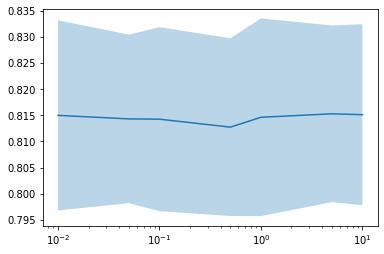

In [45]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}


estimator = LogisticRegression()
clf_zeros = GridSearchCV(estimator, param_grid, cv = 5)
clf_zeros.fit(X_train_zeros, y_train)
clf_zeros.best_estimator_

plot_scores(clf_zeros)

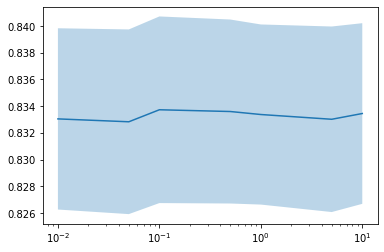

In [46]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

estimator = LogisticRegression()
clf_mean = GridSearchCV(estimator, param_grid, cv = 5)
clf_mean.fit(X_train_mean, y_train)
clf_mean.best_estimator_

plot_scores(clf_mean)

In [47]:
y_zeros = clf_zeros.predict_proba(X_test_zeros)[:, 1]
roc_auc_zeros = roc_auc_score(y_test, y_zeros)
roc_auc_zeros

0.8178411901272394

In [48]:
f1_score(y_test, np.where(y_zeros <= 0.5, 0, 1))

0.4507840878887215

In [49]:
y_mean = clf_mean.predict_proba(X_test_mean)[:, 1]
roc_auc_mean = roc_auc_score(y_test, y_mean)
roc_auc_mean

0.8656687178962391

In [50]:
f1_score(y_test, np.where(y_mean <= 0.5, 0, 1))

0.5234818510235678

Отметим, что оценка точности на усредненных значениях выше. Для дальйнейшего обучения будем  
будем использовать заполнение пропущенных признаков средним значением.  
Большую дисперсию возможно устранить увеличением cv.

Text(0.5, 1.0, 'ROC curve')

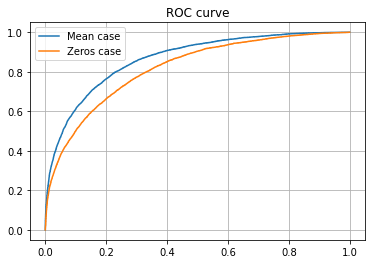

In [51]:
fpr_mean, tpr_mean, _ = roc_curve(y_test, y_mean)
fpr_zeros, tpr_zeros, _ = roc_curve(y_test, y_zeros)


plt.plot(fpr_mean, tpr_mean, label="Mean case")
plt.plot(fpr_zeros, tpr_zeros, label="Zeros case")
plt.legend()
plt.grid()
plt.title('ROC curve')

## Data scailing
Проверим данные на различие в масштабах. При необходимости проведем стандартизацию

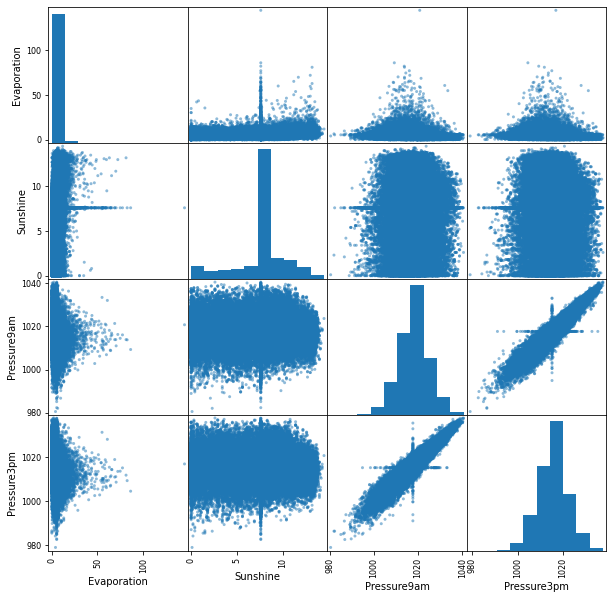

In [52]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_mean, columns=numberical_cols)
list_cols = ['Evaporation', 'Sunshine', 'Pressure9am', 'Pressure3pm']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Стандартизация осуществляется посредством вычета из каждого признака среднего значения и нормировки на выборочное стандартное отклонение:

$$ x^{scaled}_{id} = \dfrac{x_{id} - \mu_d}{\sigma_d}, \quad \mu_d = \frac{1}{N} \sum_{i=1}^l x_{id}, \quad \sigma_d = \sqrt{\frac{1}{N-1} \sum_{i=1}^l (x_{id} - \mu_d)^2} $$

Как видно из графиков, разные признаки очень сильно отличаются друг от друга по модулю значений (обратите внимание на диапазоны значений осей x и y). В случае обычной регрессии это никак не влияет на качество обучаемой модели, т.к. у меньших по модулю признаков будут большие веса, но при использовании регуляризации, которая штрафует модель за большие веса, регрессия, как правило, начинает работать хуже.  
Также между некоторыми признаками визуально присуствует достаточно сильная корелляция, что требует их отсеиваения, данные намекают на использование Lasso регуляризации.

In [138]:
scaler = StandardScaler()

X_train_real_scaled = scaler.fit_transform(X_train_real_mean)
X_test_real_scaled = scaler.transform(X_test_real_mean)

Построим такие же графики для преобразованных данных:

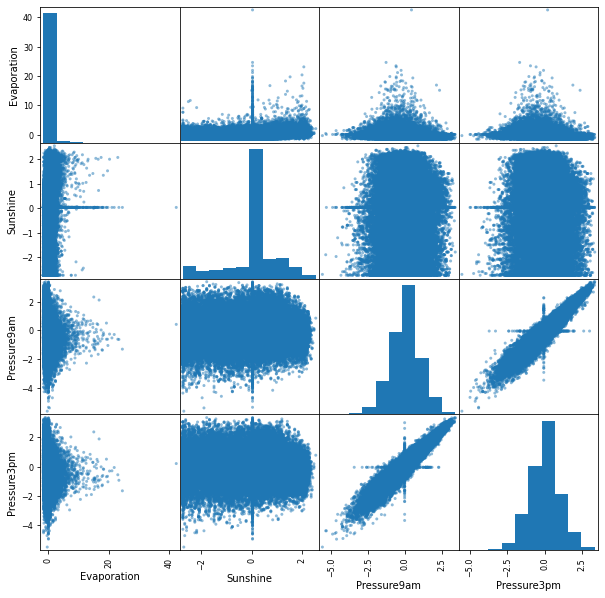

In [54]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_scaled, columns=numberical_cols)
list_cols = ['Evaporation', 'Sunshine', 'Pressure9am', 'Pressure3pm']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Как видно из графиков, мы не поменяли свойства признакового пространства: гистограммы распределений значений признаков, как и их scatter-plots, выглядят так же, как и до нормировки, но при этом все значения теперь находятся примерно в одном диапазоне, тем самым повышая интерпретабельность результатов

Проверим, изменилось ли качество логистической регрессии после стандартизации

In [139]:
X_train_scaled = np.concatenate((X_train_real_scaled, X_train_cat_oh), axis = 1)
X_test_scaled = np.concatenate((X_test_real_scaled, X_test_cat_oh), axis = 1)

In [56]:
estimator = LogisticRegression()
clf_scaled = GridSearchCV(estimator, param_grid, cv = 5)
clf_scaled.fit(X_train_scaled, y_train)
clf_scaled.best_estimator_

LogisticRegression(C=0.01)

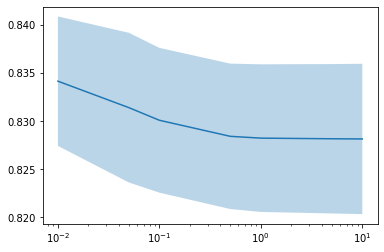

In [57]:
plot_scores(clf_scaled)

In [58]:
y_scaled = clf_scaled.predict_proba(X_test_scaled)[:, 1]
roc_auc_scaled = roc_auc_score(y_test, y_scaled)
roc_auc_scaled

0.8778830332570285

In [59]:
f1_score(y_test, np.where(y_scaled <= 0.5, 0, 1))

0.5685048322910745

In [60]:
model_comparator(roc_auc_scaled, roc_auc_mean)

Результат новой модели: 0.866
Результат предыдущей модели: 0.878
Разница абсолютная: 0.012
Прирост составил: 1.39 %


Как видим, результат действительно увеличился

## Data aligning
Проверим, сбалансированы ли классы, при необходимости выполним балансировку

In [61]:
zeros_count = np.sum(y_train==0)
ones_count = np.sum(y_train==1)

print(f"Количество меток с индексом 0: {zeros_count}")
print(f"Количество меток с индексом 1: {ones_count}")
print(f"Абсолютная разница: {ones_count - zeros_count}")
print(f"Смещение в сторону {str(0) if zeros_count > ones_count else str(1)}: в {np.round(zeros_count / ones_count, 2)} раза")

Количество меток с индексом 0: 82434
Количество меток с индексом 1: 24210
Абсолютная разница: -58224
Смещение в сторону 0: в 3.4 раза


Имеем сильное смещение в сторону одной из меток. Требуется балансировка меток.  
Стратегия: будем давать объектам миноритарного класса больший вес при обучении классификатора

In [62]:
estimator = LogisticRegression(class_weight = 'balanced')
clf_balance = GridSearchCV(estimator, param_grid, cv = 5)
clf_balance.fit(X_train_scaled, y_train)
clf_balance.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced')

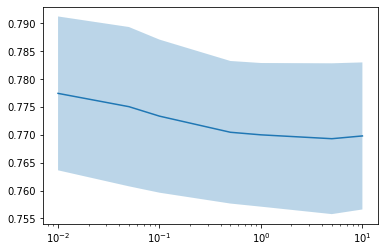

In [63]:
plot_scores(clf_balance)

In [64]:
y_balance = clf_balance.predict_proba(X_test_scaled)[:, 1]
roc_auc_balance = roc_auc_score(y_test, y_balance)
roc_auc_balance

0.8774063041410977

In [65]:
f1_score(y_test, np.where(y_balance <= 0.5, 0, 1))

0.6379310344827587

In [66]:
model_comparator(roc_auc_balance, roc_auc_scaled)

Результат новой модели: 0.878
Результат предыдущей модели: 0.877
Разница абсолютная: -0.0
Прирост составил: -0.05 %


Балансировка выборки путем взвешивания __не принесла особых результатов__

__Так как мы работаем над выборкой, в которой нельзя имеет место временная компонента и нельзя перемешивать данные, то стратификация выборки нас не интересует по определению__

## Data polynaminising
Произведем базовое преобразование - полинамиальное преобразование вещественных признаков модели при помощи полиномиальных признаков степени 2

In [67]:
from sklearn.preprocessing import PolynomialFeatures


transform = PolynomialFeatures(2)
X_train_real_poly = transform.fit_transform(X_train_real_mean)
X_test_real_poly = transform.transform(X_test_real_mean)

scaler = StandardScaler()
X_train_real_poly_scaled = scaler.fit_transform(X_train_real_poly)
X_test_real_poly_scaled = scaler.transform(X_test_real_poly)

X_train_poly = np.concatenate([X_train_real_poly_scaled, X_train_cat_oh], axis = 1)
X_test_poly = np.concatenate([X_test_real_poly_scaled, X_test_cat_oh], axis = 1)

In [68]:
estimator = LogisticRegression(fit_intercept = False)
clf_poly = GridSearchCV(estimator, param_grid, cv = 5)
clf_poly.fit(X_train_poly, y_train)
clf_poly.best_estimator_

LogisticRegression(C=0.01, fit_intercept=False)

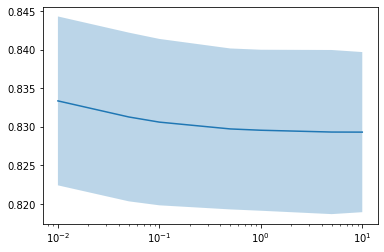

In [69]:
plot_scores(clf_poly)

In [70]:
y_poly = clf_poly.predict_proba(X_test_poly)[:, 1]
roc_auc_poly = roc_auc_score(y_test, y_poly)
roc_auc_poly

0.8814276064587043

In [71]:
f1_score(y_test, np.where(y_poly <= 0.5, 0, 1))

0.5811037457072119

In [72]:
model_comparator(roc_auc_poly, roc_auc_scaled)

Результат новой модели: 0.878
Результат предыдущей модели: 0.881
Разница абсолютная: 0.004
Прирост составил: 0.4 %


Получили прирост метрики на полиномиальных признаках. Далее будем использовать данную модель

## Data Regularisation
К логистической регрессии также можно применить L1-регуляризацию (Lasso), вместо регуляризации L2, которая будет приводить к отбору признаков. Применим L1-регуляцию к исходным признакам (применение отбора признаков к полиномиальным так же можно успешно применять, но в нём уже будет отсутствовать компонента интерпретации, т.к. смысловое значение оригинальных признаков известно, а полиномиальных - уже может быть достаточно нетривиально). 

In [73]:
estimator = LogisticRegression(penalty = 'l1', class_weight = 'balanced', solver='liblinear')
clf_lasso = GridSearchCV(estimator, param_grid, cv = 5)
clf_lasso.fit(X_train_scaled, y_train)
clf_lasso.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear')

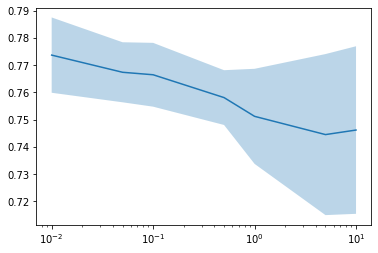

In [74]:
plot_scores(clf_lasso)

In [75]:
y_lasso = clf_lasso.predict_proba(X_test_scaled)[:, 1]
roc_auc_lasso = roc_auc_score(y_test, y_lasso)
roc_auc_lasso

0.8779429524340159

In [76]:
f1_score(y_test, np.where(y_lasso <= 0.5, 0, 1))

0.6373337711377444

In [77]:
model_comparator(roc_auc_lasso, roc_auc_scaled)

Результат новой модели: 0.878
Результат предыдущей модели: 0.878
Разница абсолютная: 0.0
Прирост составил: 0.01 %


## Final model | LR from scikit-learn
Замерим ее время работы и выведем все метрики классификации

- Примененная модель: логистическая регрессия
- Кросс-валидация: на k=5 фолдов
- Сплит данных: 25% тест, 75% трейн
- Масштабирование признаков: стандартизация
- Балансировка классов: применялась
- Стратификация: не применялась
- Полиномиализация: применялась, была отвергнута
- Регуляризация: L1-lasso

- Метрика качества: ROC-AUC, лучшее значение - 0.878
- Метрика качества: F1-мера, лучшее значение - 0.637

Text(0.5, 1.0, 'ROC curve')

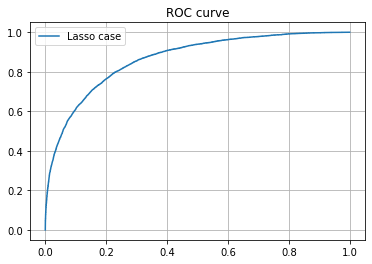

In [78]:
fpr_own, tpr_fpr_own, _ = roc_curve(y_test, y_lasso)
plt.plot(fpr_mean, tpr_mean, label="Lasso case")
plt.legend()
plt.grid()
plt.title('ROC curve')

# CASE 2. Classification by KMeans from sklearn
## Model description
В данном блоке работа построена следующим образом:
- 1) Построим алгоритм классификации c KNeighborsClassifier (algorithm=auto)
- 2) Оценим качество модели метрикой ROC-AUC
- 3) Произведем синтез признаков, а затем передадим их нашей логистической модели и посмотрим на качество

In [157]:
# Существующие доступные параметры для перебора по сетке
estimator.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [227]:
param_grid = {'n_neighbors': [5, 10, 15, 25, 50]}

In [228]:
estimator = sklearn.neighbors.KNeighborsClassifier()
clf_kNeighbors = GridSearchCV(estimator, param_grid, cv = 5)
clf_kNeighbors.fit(X_train_scaled, y_train)
clf_kNeighbors.best_estimator_

KNeighborsClassifier(n_neighbors=50)

In [229]:
y_kNeighbors = clf_kNeighbors.predict_proba(X_test_scaled)[:, 1]

In [230]:
roc_auc_kNeighbors = roc_auc_score(y_test, y_kNeighbors)
roc_auc_kNeighbors

0.8671122816892337

In [231]:
f1_score(y_test, np.where(y_kNeighbors <= 0.5, 0, 1))

0.4936573164195104

Как видно, модель уступает по качеству модели логистической регрессии

In [232]:
model_comparator(roc_auc_kNeighbors, roc_auc_scaled)

Результат новой модели: 0.878
Результат предыдущей модели: 0.867
Разница абсолютная: -0.011
Прирост составил: -1.24 %


## Feature generation
Теперь применим метод k-ближайших соседей для генерации новых признаков. Добавим их к существующему датасету и затем вновь обучим на новом датасете логистическую регрессию из CASE 1.

In [193]:
# Взято из Семинара 2.
from sklearn.base import BaseEstimator, ClassifierMixin
class NearestNeighborsFeats(BaseEstimator, ClassifierMixin):
    ''' 
        Этот класс реализует создание KNN признаков.
    '''

    def __init__(self, k_list, metric, n_jobs = 4,  n_classes=None, n_neighbors=None, eps=1e-10):
        self.n_jobs = n_jobs
        self.k_list = k_list
        self.metric = metric
        self.n_neighbors = n_neighbors or max(k_list)
        self.eps = eps
        self.n_classes_ = n_classes

    def fit(self, X, y):
        # Создание объекта-классификатора  
        self.NN = NearestNeighbors(n_neighbors=max(self.k_list),
                                   metric=self.metric,
                                   n_jobs=-1,
                                   algorithm='brute' if self.metric == 'cosine' else 'auto')
        self.NN.fit(X)

        # Сохраниение меток 
        self.y_train = y.values

        # Определение количества классов 
        self.n_classes = len(np.unique(y)) if self.n_classes_ is None else self.n_classes_

    def predict(self, X):
        '''
            Создание признаков для каждого объекта в наборе данных
        '''
        result = []
        for k in self.k_list:
            
            neighs_dist, neighs = self.NN.kneighbors(X)
            neighs_dist, neighs = neighs_dist[:, :k], neighs[:, :k] 

            neighs_y = self.y_train[neighs]

            # 1. Доля объектов каждого класса среди ближайших соседей
            fraction = np.mean(neighs_y, axis = 1)

            # 2. Минимальная дистанция до объектов каждого из классов

            # где y=1  не трогаем значение дистанции, где y=0 прибалвяем к дистанции np.inf
            ones = np.min(neighs_dist + np.where(neighs_y, 0, np.inf), axis =1)
            zeros = np.min(neighs_dist + np.where(neighs_y, np.inf, 0), axis =1)

            # 3. Средняя дистанция 

            mean_distance = np.median(neighs_dist, axis=1)

            # 4. Минимальная дистанция до объектов каждого класса деленная на расстояние до среднего объекта

            norm_ones = ones/(mean_distance + self.eps)

            norm_zeros = zeros/(mean_distance + self.eps)

            # 6. Средняя дистанция до объекта каждого класса из k ближайших соседей

            ones_mean = (np.sum(neighs_dist*neighs_y, axis=1) + self.eps) / np.sum(neighs_y, axis=1)

            mask = 1 * ~neighs_y.astype(bool)

            zeros_mean = (np.sum(neighs_dist*mask, axis=1) + self.eps) / np.sum(mask, axis=1)
            
            column_names = ['fraction_ones', 'min_distance_one', 'min_distance_zero',
                            'mean_distance', 'norm_min_distance_one', 'norm_min_distance_zero',
                            'mean_distance_one', 'min_distance_zero']
            
            result.append(pd.DataFrame(data = np.c_[[fraction, ones, zeros, mean_distance,
                                                      norm_ones, norm_zeros, ones_mean, zeros_mean]].T, 
                                        columns = column_names).add_suffix(f'_{k}'))

        return pd.concat(result, axis=1)

In [194]:
X_train_scaled_, X_valid_scaled_, y_train_, y_valid_ = train_test_split(X_train_scaled, y_train, 
                                                         test_size=0.1, 
                                                         random_state=42,
                                                         shuffle=False)

In [195]:
nnf = NearestNeighborsFeats([10], 'minkowski')

In [196]:
nnf.fit(X_valid_scaled_, y_valid_)

In [197]:
train_features = nnf.predict(X_train_scaled)
test_features = nnf.predict(X_test_scaled)

In [198]:
train_features.replace({np.inf: 0}, inplace=True)
test_features.replace({np.inf: 0}, inplace=True)

In [199]:
X_train_with_kNN_features = np.concatenate((X_train_real_scaled, train_features), axis = 1)
X_test_with_kNN_features = np.concatenate((X_test_real_scaled, test_features), axis = 1)

In [201]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

estimator = LogisticRegression(penalty = 'l1', class_weight = 'balanced', solver='liblinear')
clf_lasso = GridSearchCV(estimator, param_grid, cv = 5)
clf_lasso.fit(X_train_with_kNN_features, y_train)
clf_lasso.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [202]:
y_LR_with_kNN = clf_lasso.predict_proba(X_test_with_kNN_features)[:, 1]
roc_auc_with_kNN = roc_auc_score(y_test, y_LR_with_kNN)
roc_auc_with_kNN

0.8784819817762809

Text(0.5, 1.0, 'ROC curve')

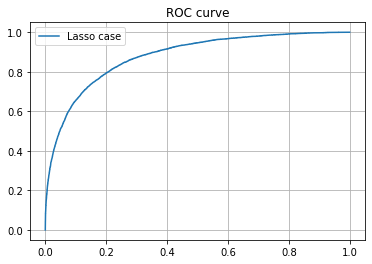

In [203]:
fpr_LR_with_kNN, tpr_fpr_LR_with_kNN, _ = roc_curve(y_test, y_LR_with_kNN)
plt.plot(fpr_LR_with_kNN, tpr_fpr_LR_with_kNN, label="Lasso case")
plt.legend()
plt.grid()
plt.title('ROC curve')

In [204]:
f1_score(y_test, np.where(y_LR_with_kNN <= 0.5, 0, 1))

0.6433346441211167

In [205]:
model_comparator(roc_auc_with_kNN, roc_auc_scaled)

Результат новой модели: 0.878
Результат предыдущей модели: 0.878
Разница абсолютная: 0.001
Прирост составил: 0.07 %


Синтезированные признаки не дали существенного прироста в качестве модели. Однако достаточно сильно увеличили время на обучение. Откуда делаем вывод, что синтезирование данных признаков - не рационально

## Final model | kNN from scikit-learn
Замерим ее время работы и выведем все метрики классификации

- Примененная модель: k-ближайших соседей
- Количество соседей: k = 10 соседей
- Кросс-валидация: на cv = 5 фолдов
- Сплит данных: 25% тест, 75% трейн
- Масштабирование признаков: стандартизация
- Балансировка классов: применялась
- Стратификация: не применялась
- Стратегия изменения весов: не применялась

- Метрика качества: ROC-AUC, лучшее значение - 0.878
- Метрика качества: F1-мера, лучшее значение - 0.643

Text(0.5, 1.0, 'ROC curve')

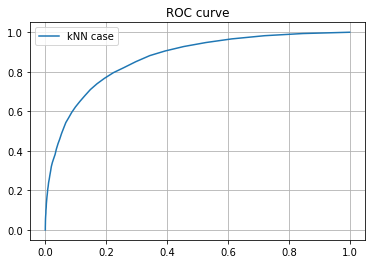

In [233]:
fpr_own_kNN, tpr_fpr_kNN, _ = roc_curve(y_test, y_kNeighbors)
plt.plot(fpr_own_kNN, tpr_fpr_kNN, label="kNN case")
plt.legend()
plt.grid()
plt.title('ROC curve')

# CASE 3. Classification by NaiveBayes from sklearn
## Model description
В наивных баесовских классификаторах принимается достаточно грубое допущение о независимости данных, а также о том, что данные получены из того или иного параметрического распределения. Рассмотрим работу 3-х классификаторов на наших входных данных.  

  
Все процедуры выполним по аналогии с __CASE 1__

In [83]:
(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.25, 
                                     random_state=42, shuffle=False)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.25,
                                      random_state=42, shuffle=False)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_bin_oh_encoded, 
                                   test_size=0.25, 
                                   random_state=42, shuffle=False)

Проверим, какая стратегия заполнения пустых данных лучше воспринимается классификаторами.
Для проверки будем использовать cross_val_score c количеством фолдов равным 5. Функция возвращает значение ROC-AUC метрики.

In [84]:
clfs = {
    'bernoulli': naive_bayes.BernoulliNB(),
    'multinomial': naive_bayes.MultinomialNB(),
    'gaussian': naive_bayes.GaussianNB()
}

In [85]:
zero_scores = {}
for clf_type in clfs:
    zero_scores[clf_type] = model_selection.cross_val_score(clfs[clf_type],
                                                            X_train_real_zeros, y_train, cv=5).mean()
zero_scores

{'bernoulli': 0.7679569878990447,
 'multinomial': nan,
 'gaussian': 0.8051556594315252}

In [86]:
mean_scores = {}
for clf_type in clfs:
    mean_scores[clf_type] = model_selection.cross_val_score(clfs[clf_type],
                                                            X_train_real_mean, y_train, cv=5).mean()
mean_scores

{'bernoulli': 0.780231419879678,
 'multinomial': nan,
 'gaussian': 0.8113257123941541}

Как и в CASE 1 лучшие значения метрики получаются на датасете с замененными пропусками в качестве среднего значения.
Стоит отметить тот факт, что MultinomialNB дает значение nan. Как оказалось, ошибка связана с тем, что данный классификатор не умеет работать с отрициательными значениями.   

Данный инсайд потребовал проверить, есть ли в данных отрицательные значения и почему они там могли оказаться.
После небольшого ресерча оказалось, что в датасейте действительно имеются отрицательные значения - значения температуры воздуха в 9:00, 15:00 и максимальная температура воздуха

In [87]:
any(X["Temp3pm"])

True

In [88]:
any(X["Temp9am"])

True

In [89]:
any(X["MaxTemp"])

True

In [90]:
pd.unique(X["Temp3pm"])[-40:]

array([-1.7, -1.5,  3.3,  2.2, -2. , -2.2,  2.5, -2.3,  3.9,  3.1, -3.7,
        4.7,  1.7,  0.1,  1.5, -3.9, -0.5, -2.7, -3.5, -2.1,  0.5, -2.5,
       -3.2, -4.1, -3.4, -0.8, -3. , -4.4, -2.4, -4. , -4.2, -5.4, -3.8,
       44.4, 46.1, 45.4, 43.6, 44.5, 44.3, 45. ])

In [91]:
pd.unique(X["Temp9am"])[-40:]

array([-4.8, -2.7, -5.2, -5.3, -1.5, -3.9, -3. , -3.8, -4.4, -2.6, -6.2,
       -3.5, -4.5, -5.6, -7. , -7.2, 36. , 35.4, 34.6, 33.8, 36.9, 35.3,
       36.1, 38.3, 37.4, 34.7, 38.6, 35.8, 37.9, 35. , 40.2, 37. , 39.4,
       39. , 38.2, 36.2, 38.9, 36.6, 39.1, 38. ])

In [92]:
pd.unique(X["MaxTemp"])[-40:]

array([-0.8, -2. ,  4.5,  1.7, -0.9, -2.1, -1.5, -3.1,  1.1, -1.2,  4.8,
        6.1,  6.4,  3.7, -1.1,  1.5,  5.4,  1.3,  0.8, -2.3, -3.7, -2.9,
       -0.4, -1.9, -3.8,  0.7, -4.1, -3.2, -3. , -4.8, 44.2, 46.8, 46.7,
       45. , 46.3, 44.7, 45.6, 46.2, 48.1, 46.1])

Откуда делаем вывод, что мультиномиальные баейсовский классификатор использовать нельзя

## Model fitting

In [93]:
scaler = StandardScaler()

X_train_real_scaled = scaler.fit_transform(X_train_real_mean)
X_test_real_scaled = scaler.transform(X_test_real_mean)

X_train = np.concatenate([X_train_real_scaled, X_train_cat_oh], axis = 1)
X_test = np.concatenate([X_test_real_scaled, X_test_cat_oh], axis = 1)

In [94]:
clfs = {
    'bernoulli': naive_bayes.BernoulliNB(),
    'gaussian': naive_bayes.GaussianNB()
}

In [95]:
# Качество на обучающей выборке
scores_NB = {}
for clf_type in clfs:
    scores_NB[clf_type] = model_selection.cross_val_score(clfs[clf_type], X_train, y_train, cv=5).mean()
scores_NB

{'bernoulli': 0.7359253144314256, 'gaussian': 0.4320076513044994}

In [96]:
bnb = naive_bayes.BernoulliNB()
gnb = naive_bayes.GaussianNB()
y_pred_bnb = bnb.fit(X_train, y_train).predict(X_test)
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [97]:
roc_auc_score(y_test, y_pred_bnb)

0.7640654806533567

In [98]:
f1_score(y_test, np.where(y_pred_bnb <= 0.5, 0, 1))

0.5958504430516534

In [99]:
roc_auc_score(y_test, y_pred_gnb)

0.6521020380781342

In [100]:
f1_score(y_test, np.where(y_pred_gnb <= 0.5, 0, 1))

0.4419615895639569

Лучшим алгоритмом на предоставленных данных оказался бернуллевский наивный баейсовский классификатор.
Также отметитм быстроту обучения данного алгоритма по сравнению с логистической регрессией. В то же время мы расплачиваемся достоверностью предсказания.   

__Вывод:__ использовать наивный байес в качестве модели "на коленке", если результаты удовлетворяют, то можно использовать данную модель, если нет - всегда можно использовать что-то посложнее

## Final model of CASE 3 | NaiveBayes from scikit-learn
Замерим ее время работы и выведем все метрики классификации

- Примененная модель: бернуллевский наивный баейсовский классификатор
- Кросс-валидация: на k=5 фолдов
- Сплит данных: 25% тест, 75% трейн
- Масштабирование признаков: стандартизация
- Балансировка классов: не применялась
- Стратификация: не применялась

- Метрика качества: ROC-AUC, лучшее значение - 0.764
- Метрика качества: F1-мера, лучшее значение - 0.596

Text(0.5, 1.0, 'ROC curve')

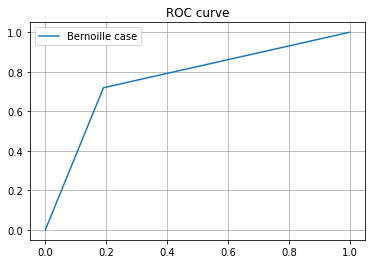

In [101]:
fpr_Bernouilli_NB, tpr_Bernouilli_NB, _ = roc_curve(y_test, y_pred_bnb)
plt.plot(fpr_Bernouilli_NB, tpr_Bernouilli_NB, label="Bernoille case")
plt.legend()
plt.grid()
plt.title('ROC curve')

# CASE 4. Classfication by LogisticRegression made byself
## Model description
Логистическая регрессия - метод построения линейного классификатора, позволяющий оценивать __апостериорные вероятности__ принадлежности объектов классам

$$p(y|x) = a(x, \theta) = \sigma(\langle x, \theta \rangle) = \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}$$ 

$\langle \theta, x_i \rangle$ - вектор из чисел - результатов скалярного перемножения вектор-строки матрицы на вектор столбец

In [102]:
theta = np.array([1, 2, 3])

X =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y = np.array([1, 1, 0, 0])

In [103]:
def probability(theta, X):
    result = 1 / (1 + np.exp(-np.dot(X, theta)))
    return result

In [104]:
prob = probability(theta, X)


assert type(prob) == np.ndarray, 'Возвращается неверный тип'
assert prob.shape == (X.shape[0],), 'Неверный размер массива'
assert (prob.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Функция считается неверно'

Функция предсказания метки класса, получает на вход вероятности принадлежности к классу 1 и выдает метки классов __(используется пороговое значение 0,5 в качестве критерия отсева)__ $y \in \{0, 1\}$

In [105]:
def binary_class_prediction(theta, X, threshold =.5):
    # вектор вероятностей принадлежности к классу 1
    prob =  probability(theta, X)
    # метки классов
    result = np.where(prob <= threshold, 0, 1)
    return result

In [106]:
y_pred = binary_class_prediction(theta, X)

assert type(y_pred) == np.ndarray, 'Возвращается неверный тип'
assert y_pred.shape == (X.shape[0],), 'Неверный размер массива'
assert min(y_pred) == 0, 'Функция считается неверно'
assert max(y_pred) == 1, 'Функция считается неверно'

__Функционал качества логистической регрессии__

Запишем правдободовие выборки для меток класса $y \in \{+1, -1\}$ 

$$Likelihood(a, X^\ell) = \prod_{i = 1}^{\ell} a(x_i,\theta)^{[y_i = +1]} (1 - a(x_i, \theta))^{[y_i = -1]} → \operatorname*{max}_{\theta}$$ 

Прологарифмируем правдоподобие выборки и перейдем к задаче минимизации:

$$Q(a, X^\ell) =     -\sum_{i = 1}^{\ell} 
        [y_i = +1] \log a(x_i, \theta)
        +
        [y_i = -1] \log (1 - a(x_i, \theta)) \to \operatorname*{min}_{\theta}$$ 
        
Подставим $a(x, \theta)$ в функцинал качества:

$$ Q(a, X^\ell) = -\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{\exp(-\langle \theta, x_i \rangle)}{1 + \exp(-\langle \theta, x_i \rangle)}
\right)
=\\
=
-\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{1}{1 + \exp(\langle \theta, x_i \rangle)}
\right)
=\\
=
\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) $$
    

Итоговый оптимизируемый функционал качества (logloss), записанный для меток классов $y \in \{+1, -1\}$ и усредненный по выборке

$$Q(a, X^\ell) = \frac{1}{\ell}\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) \to \operatorname*{min}_{\theta}$$

Реализуем его в функции logloss:

In [107]:
# Переведем метки в -1 и +1 в связи с выведенным уравнением (6)
y = np.where(y == 0, -1, 1)

In [108]:
def logloss(theta, X, y): 
    result = np.average(
                    np.log(
                            1 + np.exp((-y) * np.dot(X, theta))
                           )
                       )
    return result

In [109]:
assert logloss(theta, X, y).round(3) == 0.861, 'Функция считается неверно'

## SGD optimizer

__Алгоритм оптимизации функционала качества. Стохастический градиентный спуск__

<b>Вход: </b> Выборка $X^\ell$, темп обучения $h$

<b>Выход: </b> оптимальный вектор весов $\theta$

1.  Инициализировать веса $\theta$
2.  Инициализировать оценку функционала качества: $Q(a, X^\ell)$
3.  <b>Повторять</b>: 

    Выбрать случайным образом подвыборку объектов $X^{batch} =\{x_1, \dots,x_n \}$ из $X^{\ell}$
    
    Рассчитать градиент функционала качества: $\nabla Q(X^{batch}, \theta)$
    
    Обновить веса: $\theta := \theta - h\cdot \nabla Q(X^{batch}, \theta)$
       
    <b>Пока</b> значение $Q$ и/или веса $\theta$ не сойдутся   

Реализуем функцию рассчета градиента функционала качества

$$\frac{\partial Q(a, X^{batch}) }{\partial \theta_j}   = \frac{\partial \frac{1}{n}\sum_{i = 1}^{n}
    \log \left(
        1 + \exp(- y_i \langle \theta, x_i \rangle)
    \right)} {\partial \theta_j}  = \frac{1}{n}\sum_{i = 1}^{n}
     \frac {1}{
        1 + \exp(- y_i \langle \theta, x_i \rangle)} \cdot  \exp(- y_i \langle \theta, x_i \rangle) \cdot -y_i x_{ij}$$

Реализуйте рассчет градиента в матричном виде:

In [110]:
# Функция градиента
def gradient(theta, X, y):
    margin = (-y) * np.dot(X, theta)
    result = np.average((1 / (1 + np.exp(margin))) * np.exp(margin)) * (-np.dot(y, X))
    return result

assert gradient(theta, X, y).shape == theta.shape, 'Неверный размер массива'

In [111]:
# Функция обучения
def fit(X, y, batch_size=10, h=0.05, iters=100, plot=True):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    theta = np.random.uniform(size=dim)
    # Вектор ошибок
    errors = []
    
    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]

    
    # plt 
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
        
    for _ in range(iters):  
        
        # берём случайный набор элементов, разбитый на батчи
        # на батче и будет реализовываться стохастическая версия градиентного бустинга
        batch = np.random.choice(size, batch_size, replace=False)
        X_batch = X[batch]
        y_batch = y[batch]

        # считаем производные
        grad = gradient(theta, X_batch, y_batch)
        
        assert type(grad) == np.ndarray, 'Wrong type'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(theta), 'Длина вектора должна быть равной количеству весов'
        
        
        # Обновляем веса
        theta -= grad * h
        # Вектор исторических значений весов
        theta_history = np.vstack((theta_history, theta))
        
        # Накапливаемая ошибка
        loss = logloss(theta, X, y)
        errors.append(loss)
        
        if plot:
            ax1.clear()            
            ax1.scatter(range(0, dim, 1), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.grid()
            ax1.set_title('Weight')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('Weight ID')
            ax1.set_xticks(range(0, dim, 1))
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('Logloss function')
            ax2.grid()
            ax2.set_xlabel('Number of iterations')
            ax2.set_ylabel('Error value')
            
            ax3.plot(theta_history)
            ax3.set_title("Weights evolutions history")
            ax3.set_ylabel('Values')
            ax3.set_xlabel('Number of iterations')
            ax3.grid()
            time.sleep(0.05)
            fig.canvas.draw()
            
    return theta

In [112]:
X, y = make_classification(n_samples=200)

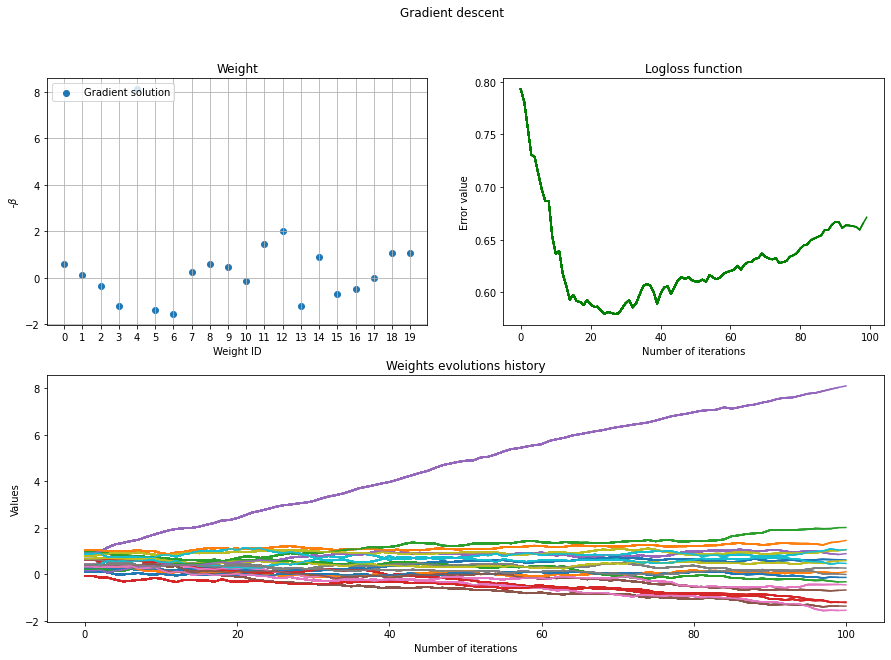

In [113]:
optimal_theta = fit(X, y)

__Оно живое, и кажется, работает!__

In [114]:
optimal_theta

array([ 0.6093362 ,  0.10054592, -0.33131083, -1.23034347,  8.10214653,
       -1.3796025 , -1.5579934 ,  0.25852031,  0.57988172,  0.4615047 ,
       -0.14314302,  1.44780828,  2.00607123, -1.19703237,  0.87871538,
       -0.68496348, -0.46292056, -0.01512997,  1.0523166 ,  1.04916198])

In [115]:
y_pred = binary_class_prediction(optimal_theta, X)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0])

## Model fitting with preprocessed data

In [116]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
106639    1
106640    0
106641    0
106642    0
106643    0
Name: RainTomorrow, Length: 106644, dtype: int64

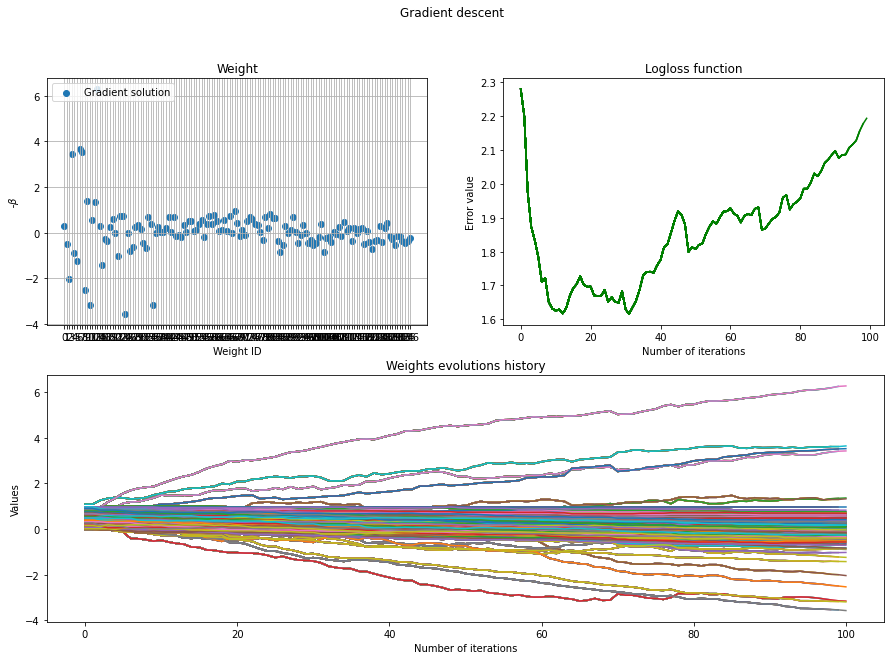

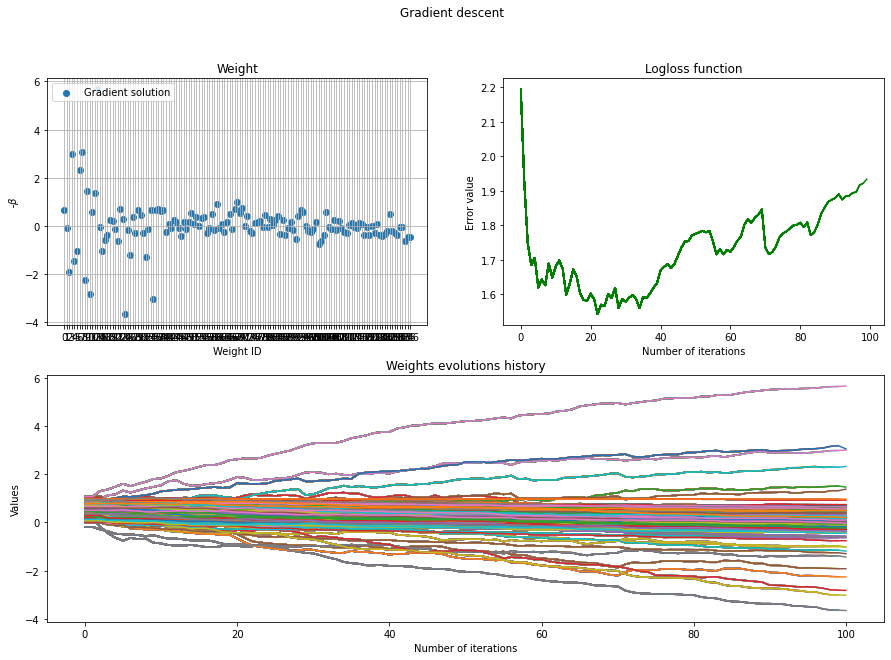

In [117]:
# Не забудем произвести перевод меток
y_train = np.where(y_train == 0, -1, 1)

fit(X_train_scaled, y_train)
optimal_theta = fit(X_train_scaled, y_train)

In [118]:
y_pred = binary_class_prediction(optimal_theta, X_test_scaled)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [119]:
roc_auc_own = roc_auc_score(y_test, y_pred)
roc_auc_own

0.7804814101934566

Text(0.5, 1.0, 'ROC curve')

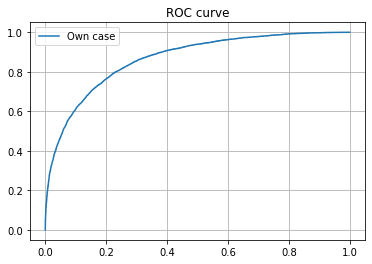

In [120]:
fpr_own, tpr_fpr_own, _ = roc_curve(y_test, y_pred)

plt.plot(fpr_mean, tpr_mean, label="Own case")
plt.legend()
plt.grid()
plt.title('ROC curve')

In [121]:
f1_score(y_test, np.where(y_pred <= 0.5, 0, 1))

0.6166945088106914

## Final model of CASE 4 | LogisticRegression made byself
Замерим ее время работы и выведем все метрики классификации
Как видно, модель реализованная своими руками дает показатели хуже, чем дефолтная модель логистической регресии "из коробки" scklearn (как минимум из-за того, что здесь мы не использовали регуляризацию) Также она работает много медленнее уже реализованного варианта. Итог - не нужно делать велосипед, используй то, что уже реализовано.

- Примененная модель: логистическая регрессия своими руками
- Кросс-валидация: на k=5 фолдов
- Сплит данных: 25% тест, 75% трейн
- Масштабирование признаков: стандартизация
- Балансировка классов: не применялась
- Стратификация: не применялась
- Полиномиализация: применялась, была отвергнута
- Регуляризация: L1-lasso

- Метрика качества: ROC-AUC, лучшее значение - 0.780
- Метрика качества: F1-мера, лучшее значение - 0.617